# The following is the practice of writitng the most general form of an extractor/embedder of animal-no-animal dataset, such as with 
# VGG-16, or HMAX, etc.

In [32]:
import animal_no_animal_utils
import constants
# Example usage
output_location = f'{constants.ROOT_PATH}/datasets/animal_no_animal'
subject = 'cba'
model_type = 'vgg'  # or 'HMAX'
layers_to_extract = ['classifier_6']
features, labels, responses = animal_no_animal_utils.extract_features_with_pytorch(output_location=output_location, subject=subject, model_type=model_type, layers_to_extract=layers_to_extract)


/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layers to be extracted are ['classifier_6']


In [33]:
import numpy as np
responses[np.logical_and(responses == 1, labels==1)] = 1
responses[np.logical_and(responses == 1, labels==0)] = 0

In [37]:
(labels - responses)[responses == 1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
import sklearn.model_selection
features_train, features_test, labels_train, labels_test, responses_train, responses_test = sklearn.model_selection.train_test_split(features, labels, responses, test_size=0.2, random_state=42)

In [24]:
features_train.shape

(800, 1000)

/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/naji/miniconda3/envs/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

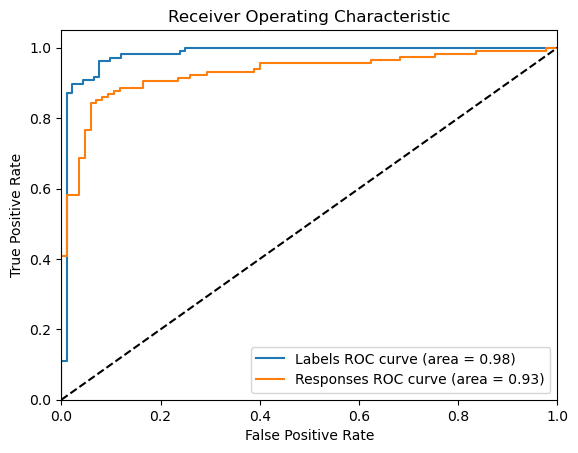

In [25]:
from sklearn.metrics import roc_curve, auc
import sklearn.linear_model
import matplotlib.pyplot as plt
# Create and fit the logistic regression models
logistic_model_labels = sklearn.linear_model.LogisticRegression(max_iter=100)
logistic_model_responses = sklearn.linear_model.LogisticRegression(max_iter=100)

logistic_model_labels.fit(features_train, labels_train)
logistic_model_responses.fit(features_train, responses_train)

# Get predicted probabilities for the positive class for both models
probs_labels = logistic_model_labels.predict_proba(features_test)[:, 1]
probs_responses = logistic_model_responses.predict_proba(features_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for both models
fpr_labels, tpr_labels, thresholds_labels = roc_curve(labels_test, probs_labels)
fpr_responses, tpr_responses, thresholds_responses = roc_curve(responses_test, probs_responses)

# Compute the area under the ROC curve for both models
roc_auc_labels = auc(fpr_labels, tpr_labels)
roc_auc_responses = auc(fpr_responses, tpr_responses)

# Plot the ROC curves for both models
plt.figure()
plt.plot(fpr_labels, tpr_labels, label='Labels ROC curve (area = %0.2f)' % roc_auc_labels)
plt.plot(fpr_responses, tpr_responses, label='Responses ROC curve (area = %0.2f)' % roc_auc_responses)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
